In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('airquality.csv')
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,1,41.0,190.0,7.4,67,5,1,high
1,2,36.0,118.0,8.0,72,5,2,medium
2,3,12.0,149.0,12.6,74,5,3,low
3,4,18.0,313.0,11.5,62,5,4,medium
4,5,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...,...
148,149,30.0,193.0,6.9,70,9,26,low
149,150,NaN,145.0,13.2,77,9,27,NaN
150,151,14.0,191.0,14.3,75,9,28,low
151,152,18.0,131.0,8.0,76,9,29,NaN


In [3]:
df.sample(10)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
10,11,7.0,NaN,6.9,74,5,11,medium
45,46,NaN,322.0,11.5,79,6,15,low
117,118,73.0,215.0,8.0,86,8,26,low
83,84,NaN,295.0,11.5,82,7,23,NaN
152,153,20.0,223.0,11.5,68,9,30,low
38,39,NaN,273.0,6.9,87,6,8,medium
118,119,NaN,153.0,5.7,88,8,27,NaN
2,3,12.0,149.0,12.6,74,5,3,low
127,128,47.0,95.0,7.4,87,9,5,NaN
64,65,NaN,101.0,10.9,84,7,4,NaN


In [4]:
df.columns

Index(['Unnamed: 0', 'Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day',
       'Humidity'],
      dtype='object')

In [5]:
# drop Unwanted Columns

In [6]:
df = df.drop(columns='Unnamed: 0')
df

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.0,190.0,7.4,67,5,1,high
1,36.0,118.0,8.0,72,5,2,medium
2,12.0,149.0,12.6,74,5,3,low
3,18.0,313.0,11.5,62,5,4,medium
4,NaN,NaN,14.3,56,5,5,low
...,...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26,low
149,NaN,145.0,13.2,77,9,27,NaN
150,14.0,191.0,14.3,75,9,28,low
151,18.0,131.0,8.0,76,9,29,NaN


In [7]:
df.isnull().sum()

Ozone       37
Solar.R      7
Wind         0
Temp         0
Month        0
Day          0
Humidity    72
dtype: int64

In [8]:
df['Ozone'] = df['Ozone'].fillna(df['Ozone'].mean())

In [9]:
df['Solar.R'] = df['Solar.R'].fillna(df['Solar.R'].mean())

In [10]:
df['Humidity'] = df['Humidity'].fillna(df['Humidity'].mode()[0])

In [11]:
df.isnull().sum()

Ozone       0
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
Humidity    0
dtype: int64

In [12]:
from sklearn import preprocessing

In [13]:
df['Humidity'].unique()

array(['high', 'medium', 'low', ' '], dtype=object)

In [14]:
labelEncoding = preprocessing.LabelEncoder()

In [15]:
df['Humidity'] = labelEncoding.fit_transform(df['Humidity'])

In [16]:
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
0,41.00000,190.000000,7.4,67,5,1,1
1,36.00000,118.000000,8.0,72,5,2,3
2,12.00000,149.000000,12.6,74,5,3,2
3,18.00000,313.000000,11.5,62,5,4,3
4,42.12931,185.931507,14.3,56,5,5,2


In [17]:
labelEncoding.classes_

array([' ', 'high', 'low', 'medium'], dtype=object)

In [18]:
labelEncoding.transform(labelEncoding.classes_)

array([0, 1, 2, 3])

In [19]:
import matplotlib.pyplot as plt

In [20]:
labels = 'Ozone', 'Solar.R', 'Wind', 'Temp'

In [21]:
sizes = [df['Ozone'].mean(), df['Solar.R'].mean(), df['Wind'].mean(), df['Temp'].mean()]

In [22]:
colors = ['Red', 'Blue', 'Green', 'Yellow']

In [23]:
explode = (0.1, 0, 0.2, 0)

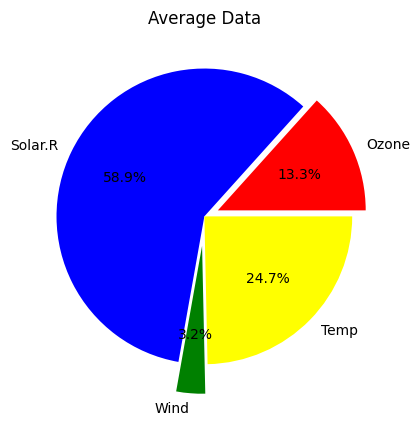

In [24]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',)
plt.title('Average Data')
plt.show()

In [25]:
x = df.iloc[:, 3]

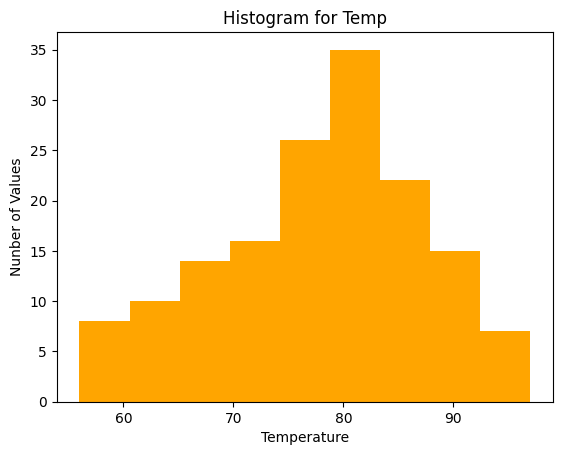

In [26]:
plt.hist(x, bins='auto', color='orange', alpha=1)

plt.title('Histogram for Temp')
plt.ylabel('Nunber of Values')
plt.xlabel('Temperature')

plt.show()

In [27]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day,Humidity
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,1.960784
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520,0.457141
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000,2.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000,2.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000,2.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,3.000000


In [28]:
ozone = df.iloc[:16, 0]
wind = df.iloc[:16, 2]

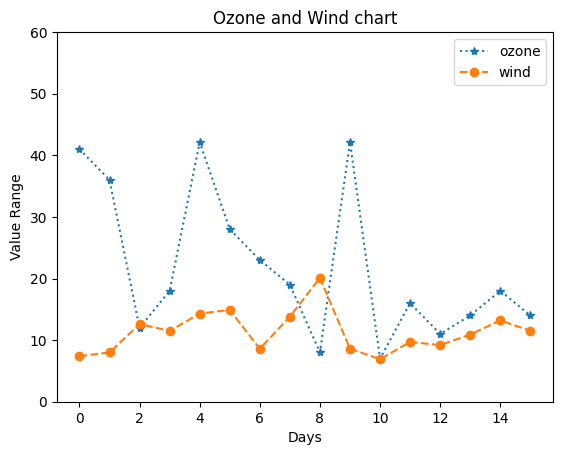

In [29]:
plt.plot(ozone, label='ozone', marker='*', linestyle = 'dotted')
plt.plot(wind, label='wind', marker='o', linestyle = 'dashed')

plt.ylim(0,60)
plt.title('Ozone and Wind chart')
plt.xlabel('Days')
plt.ylabel('Value Range')
plt.legend()

In [30]:
wind = df.iloc[:, 2]
temp = df.iloc[:, 3]

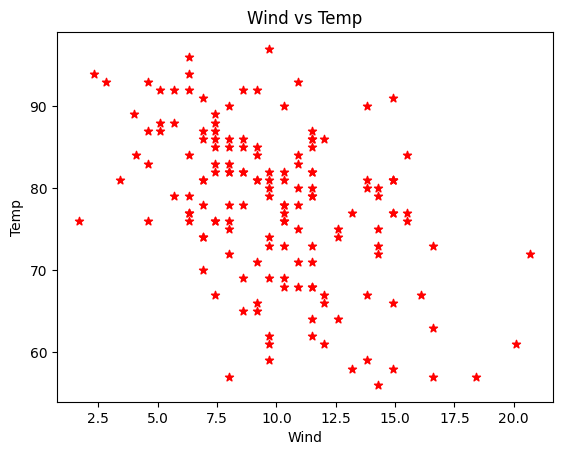

In [31]:
plt.scatter(wind, temp, c='red', marker="*")

plt.title('Wind vs Temp')
plt.xlabel('Wind')
plt.ylabel('Temp')

plt.show()

In [32]:
import seaborn as sns

<Axes: >

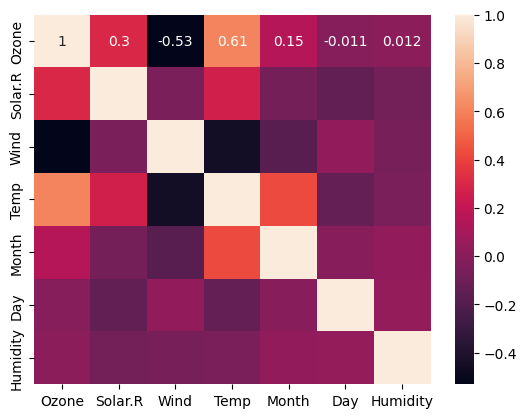

In [33]:
sns.heatmap(df.corr(), annot=True)

c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\panka\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


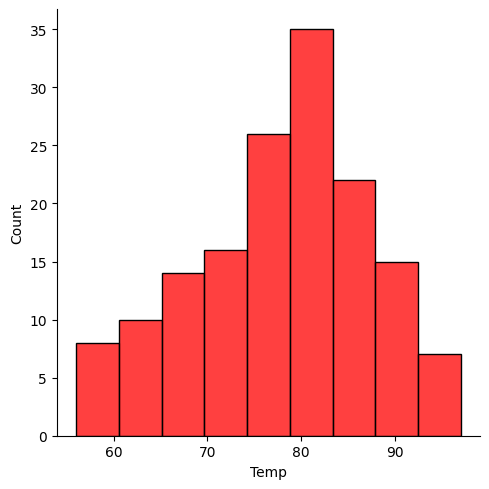

In [34]:
sns.displot(df['Temp'] , color='red')
plt.show()